In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model

Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table

Measurement=Base.classes.measurement

Station=Base.classes.station



In [72]:
table = sqlalchemy.inspect(Measurement)
for col in table.c:
    print(col)

measurement.id
measurement.station
measurement.date
measurement.prcp
measurement.tobs


In [60]:
# Create our session (link) from Python to the DB

session=Session(engine)


# Exploratory Precipitation Analysis

In [62]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date


('2017-08-23',)

Text(0.5, 1.0, 'Precipitation_Last_12_Months')

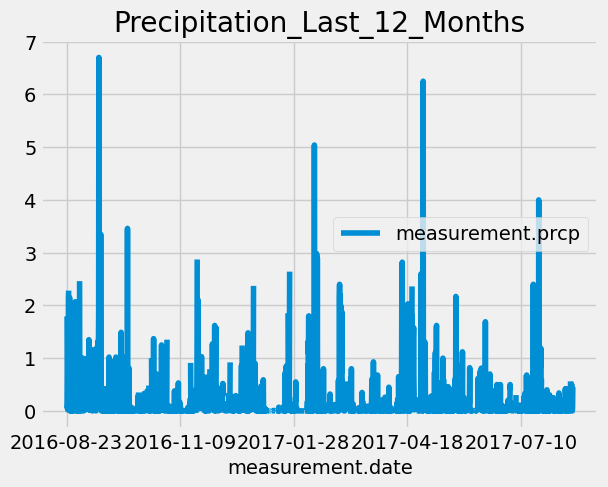

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

Date_one_year_from_the_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores


query_data_retrieval = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=Date_one_year_from_the_last_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

Precipitation_Results = pd.DataFrame(query_data_retrieval,columns = ["measurement.date",
"measurement.prcp"])

Precipitation_Results.head()


# Sort the dataframe by date

Precipitation_Results.sort_values("measurement.date",ascending=True,inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
#date = x
#precipitation = y

Precipitation_Results.plot(x="measurement.date",y="measurement.prcp")

plt.title("Precipitation_Last_12_Months")


In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data

Precipitation_Results.describe()


,measurement.prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number of stations in the dataset

TotalNumberOfStations = session.query(func.count(Station.station)).first()

TotalNumberOfStations


(9,)

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

ActiveStations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
ActiveStations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

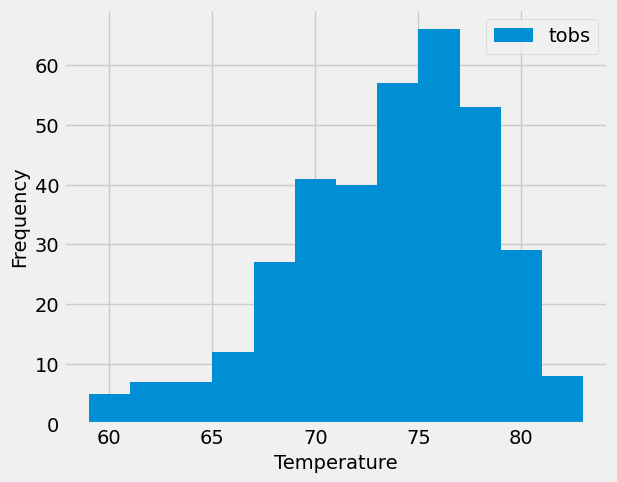

In [92]:
# Using the most active station id

                                                            
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")




# Close Session

In [57]:
# Close Session
session.close()